In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from matplotlib import rcParams
from scipy.stats import spearmanr, kendalltau, pearsonr
import random
from sklearn.metrics import r2_score
import math
from scipy import stats
from matplotlib import gridspec
import pandas as pd
import seaborn as sns
import scipy   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


def format_axis(ax):
    
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    

    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black') 

In [106]:
field_title = { 'director':      'Movie directors',
                'art-director':  'Movie art directors',
                'producer':      'Movie producers' ,
                'composer':      'Soundtrack composers',
                'writer':        'Plot writers',
                'authors':       'Book authors',
                'electro':       'Electronic music artists', 
                'rock':          'Rock musicians',
                'pop':           'Pop musicians',
                'jazz':          'Jazz musicians',
                'folk':          'Folk musicians',
                'funk':          'Funk musicians',
                'hiphop':        'Hip-hop artists',
                'classical':     'Classical musicians',
               } 


colors_field =  {    'art_director': 'steelblue',
                     'authors'     : 'darkgreen', 
                     'classical'   : 'darkred',
                     'composer'    : 'steelblue',
                     'director'    : 'steelblue',
                     'electro'     : 'darkred',
                     'folk'        : 'darkred',
                     'funk'        : 'darkred',
                     'hiphop'      : 'darkred',
                     'jazz'        : 'darkred',
                     'pop'         : 'darkred',
                     'producer'    : 'steelblue',
                     'rock'        : 'darkred',
                     'writer'      : 'steelblue'}

sci_fields = ['mathematics', 'physics', 'health_science', 'zoology', 'agronomy', 'psychology', 'environmental_science', 
          'engineering', 'theoretical_computer_science', 'applied_physics', 'space_science_or_astronomy', 'chemistry', 
          'political_science', 'biology', 'geology']  

for sci in sci_fields:
    field_title[sci] = ' '.join([s if 'or' == s else s.title()  for s in sci.split('_')])


for sci in sci_fields:
    colors_field[sci] = 'darkorange'

In [107]:
skillz = {}

for line in open('DataToPlot/5_LuckSkill/art_sci_vars.dat'):
    
    if 'p_var' not in line:
    
        fields = line.strip().split('\t')
        field  = fields[0]
        params = [float(f) for f in fields[1:]]

        p_var, p_mean, Q_var, Q_mean,logp_var, logp_mean, logQ_var, logQ_mean = params
        skill = logQ_var / (logp_var + logQ_var)
        
        skillz[field] = skill

#### PLOT

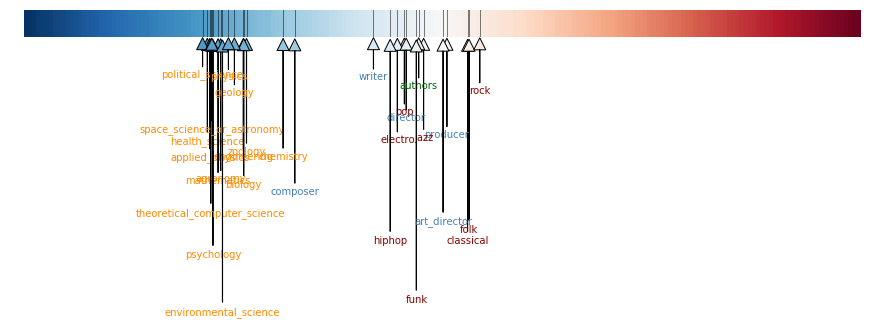

In [108]:
def get_a_scale(ax, NNN, colors):

    values = np.arange(0.0,1.0,1.0/NNN)
    values = np.asarray([np.asarray(values), np.asarray(values)])
    
    sns.heatmap(values, cmap=colors,  ax = ax, vmin=0, vmax = 1,linewidths = 0, cbar= False)
    ax.axis('off')

   

NNN    = 200.0
f, ax  = plt.subplots(1,1, figsize = (15,0.5))
colors = sns.color_palette("RdBu_r", int(NNN))

get_a_scale(ax, NNN, colors)


ypositions  = {k : 0.0001+20*random.random() for k, v in skillz.items()}


for ind, (title, val) in enumerate(skillz.items()):

    xcoord = val * NNN
    
    ax.axvline(x=xcoord, ymin=-0.5, ymax=5.5, color = 'k', linewidth = 0.5)
 
    ax.annotate(title, xy=(xcoord,  2), xytext=(xcoord, 4.5 + ypositions[title]), 
                horizontalalignment = 'center', 
                fontsize = 10,
                color    = colors_field[title],
                arrowprops=dict(facecolor=colors[int(xcoord)], shrink=0.01,width = 0.2),)

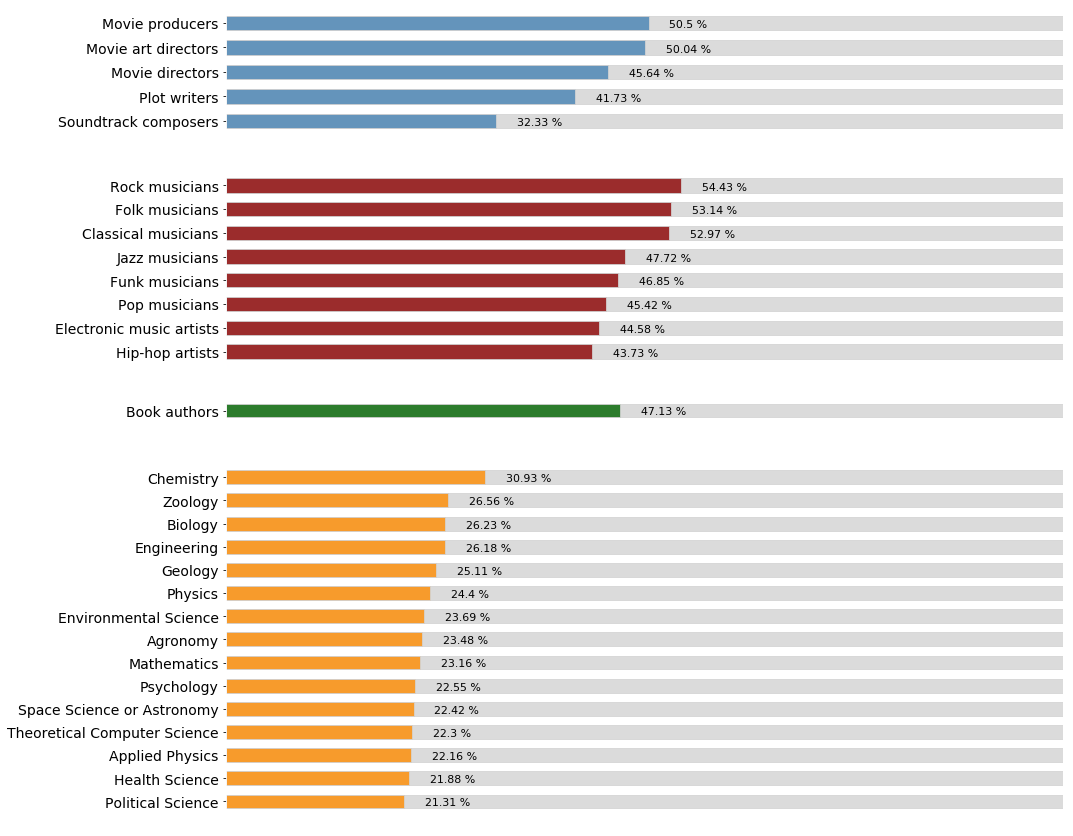

In [109]:
film    = ['writer', 'art_director', 'producer', 'director', 'composer']
book    = ['authors']
music   = ['electro', 'pop', 'rock', 'funk', 'folk', 'hiphop', 'jazz', 'classical']
colorsf = ['steelblue', 'darkred', 'darkgreen', 'darkorange']


NNN    = 100.0
values = np.arange(0.0,1.0,1.0/NNN)
colors = sns.color_palette("RdBu_r", int(NNN))
values = np.asarray([np.asarray(values), np.asarray(values)])


f = plt.figure(figsize=(15, 15)) 
gs = gridspec.GridSpec(4, 1, height_ratios=[5, 8, 0.6, 15]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

axes = [ax0, ax1, ax2, ax3]

for ax in axes:
    ax.set_xlim([0.0,1])
    ax.get_xaxis().set_visible(False)
    for t in ['top', 'bottom',  'right', 'left']:
        ax.spines[t].set_color('white')    
    
    
xfilm_ls,    yfilm_ls    = zip(*sorted([(field_title[k.replace('_', '-')], v) for k, v in skillz.items() if k in film],  key=lambda tup: tup[1], reverse = False))
xmusic_ls,   ymusic_ls   = zip(*sorted([(field_title[k], v) for k, v in skillz.items() if k in music], key=lambda tup: tup[1], reverse = False))
xbook_ls,    ybook_ls    = zip(*sorted([(field_title[k], v) for k, v in skillz.items() if k in book], key=lambda tup: tup[1],  reverse = False))
xscience_ls, yscience_ls = zip(*sorted([(field_title[k], v) for k, v in skillz.items() if k in sci_fields], key=lambda tup: tup[1],  reverse = False))

data = [(xfilm_ls, yfilm_ls), (xmusic_ls, ymusic_ls), (xbook_ls, ybook_ls), (xscience_ls, yscience_ls)]


for ind, (x, y) in enumerate(data):
    axes[ind].barh(x, [1.0 for i in range(len(x))], height = 0.6, edgecolor = 'lightgrey', color = 'lightgrey', alpha = 0.8)
    axes[ind].barh(x, y, height = 0.6, edgecolor = 'lightgrey', color = colorsf[ind], alpha = 0.8)
    axes[ind].set_yticklabels(x, fontsize=14)

    
for jind, ax in  enumerate(axes):
    x, y = data[jind]
    for ind, i in enumerate(ax.patches):
        try:
            ax.text(y[ind] + 0.025, i.get_y()+0.12, str(round(100*y[ind],2)) + ' %', fontsize=11,color='k')
        except:
            pass
    